<a href="https://colab.research.google.com/github/dutta-arka/Transit-Detect/blob/main/Candidate/TIC_298434280_Vetting_Results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install triceratops

In [ ]:
!pip install lightkurve

In [3]:
import numpy as np
import pandas as pd
import time
import lightkurve as lk
from lightkurve import TessLightCurve
import matplotlib.pyplot as plt
%matplotlib inline

import triceratops.triceratops as tr

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the CSV file
# .csv file is directly from SHERLOCKPIPE out product
data = pd.read_csv("lc_2.csv")

# Extract the values from each column
x = data.iloc[:, 0]
y = data.iloc[:, 1]
error = data.iloc[:, 2]

# LightCurve object
lc = lk.LightCurve(time=x, flux=y, flux_err=error)#.bin(time_bin_size=0.01)
lc = lc.remove_nans()

# Perform phase folding around the given epoch
tic_id = 298434280
period = 5.27716173230975  # Orbital period in days
epoch = 1935.07042679441
folded_lc = lc.fold(period=period, epoch_time=epoch)
folded_lc = folded_lc[folded_lc.time < 0.5]
folded_lc = folded_lc[folded_lc.time > -0.5]

# Plot the data with error bars
# plt.errorbar(x, y, fmt='o', markersize=3, capsize=2)

# # Plot a dotted line connecting the y-values
# plt.plot(x, y, linestyle=':', color='black')

# plt.xlabel('X')
# plt.ylabel('Y')
# plt.title('Folded light curve')
# plt.gcf().set_size_inches(15, 8)
# plt.grid(True)
# plt.show()

# Create a DataFrame with the required columns
folded_data = pd.DataFrame({
    'Time': folded_lc.time.value,  # Convert time to array
    'Flux': folded_lc.flux.value,  # Convert flux to array
    'Flux Error': folded_lc.flux_err.value  # Convert flux error to array
})

# Save the phase-folded light curve to a CSV file without column headers
output_filename = f"TIC_{tic_id}_all_sector_lightcurve.csv"
folded_data.to_csv(output_filename, index=False, header=False)

print(f"Phase-folded light curve saved to: {output_filename}")

Phase-folded light curve saved to: TIC_298434280_all_sector_lightcurve.csv


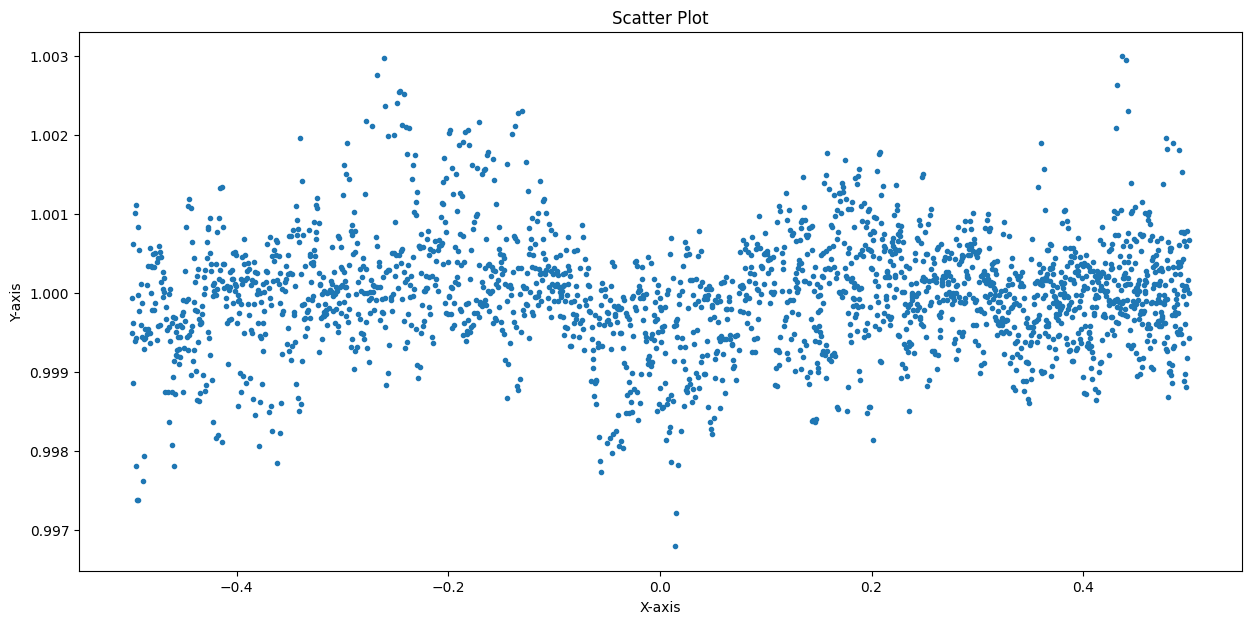

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
data = pd.read_csv(f'TIC_{tic_id}_all_sector_lightcurve.csv')

# Extract the x and y values from the dataset
x = data.iloc[:, 0]  # Assuming the first column is the x-axis
y = data.iloc[:, 1]  # Assuming the second column is the y-axis

# Set the figure size
plt.figure(figsize=(15, 7))

# Create a scatter plot
plt.scatter(x, y, marker='.')

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot')

# Show the plot
plt.show()

In [10]:
ID = tic_id
sectors = np.array([23])
target = tr.target(ID=ID, sectors=sectors, search_radius=8) # target radius shorted

Sector 23


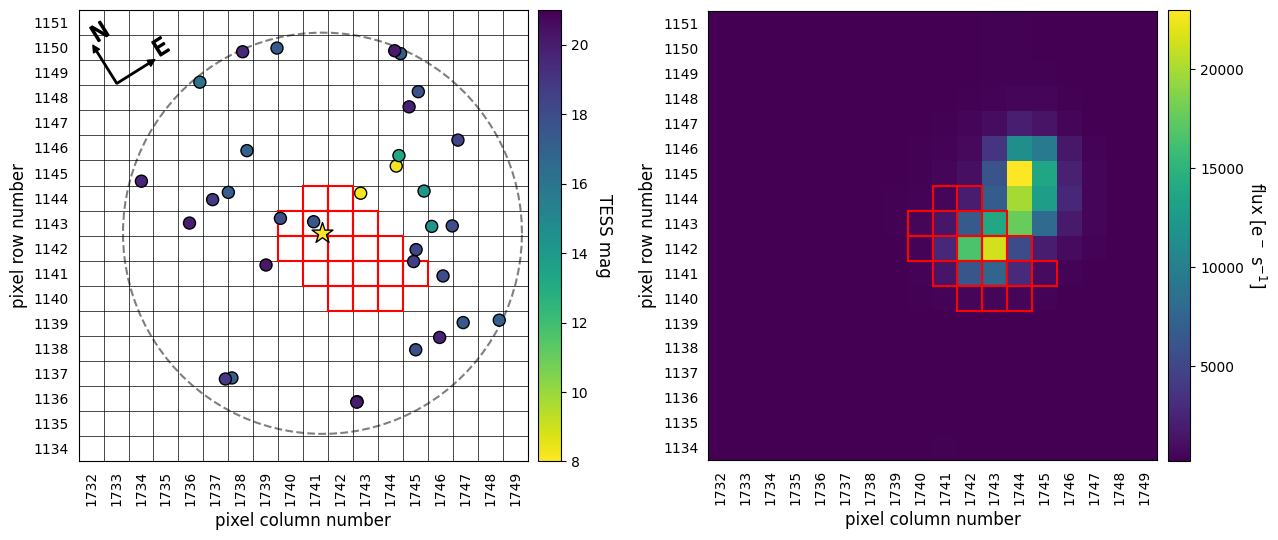

,ID,Tmag,Jmag,Hmag,Kmag,ra,dec,mass,rad,Teff,plx,sep (arcsec),PA (E of N)
0,298434280,8.04039,6.769,6.162,5.973,216.431145,23.617081,0.610943,0.628755,3838.0,61.178300,0.000,0.000
1,1000382000,17.54360,NaN,NaN,NaN,216.430814,23.620260,NaN,NaN,4655.0,0.888906,11.495,354.549
2,298434274,17.91520,16.633,16.127,15.509,216.424307,23.624598,0.630000,0.837254,4012.0,0.056800,35.228,320.192
3,298434278,8.20150,6.889,6.302,6.091,216.444384,23.620475,0.593560,0.606749,3766.0,61.202900,45.344,74.367
4,1000382001,20.15140,NaN,NaN,NaN,216.415180,23.617297,NaN,NaN,NaN,NaN,52.666,270.848
5,1000381989,18.31130,NaN,NaN,NaN,216.448578,23.603546,NaN,NaN,NaN,1.101280,75.375,130.274
6,298434285,18.69800,16.967,16.179,15.593,216.446501,23.601552,NaN,NaN,NaN,NaN,75.439,137.819
7,298434271,17.18080,16.089,15.393,15.354,216.416821,23.635342,0.660000,0.707548,4235.0,0.615191,80.954,324.298
8,298434276,8.23430,7.020,6.305,6.142,216.455383,23.621701,NaN,34.496900,4253.0,0.870541,81.657,78.243
9,1000381990,14.19660,NaN,NaN,NaN,216.454892,23.606244,1.100000,1.426350,5985.0,0.658978,87.509,116.473


In [11]:
ap_23 = np.array([[1740.0, 1142.0], [1740.0, 1143.0], [1741.0, 1141.0], [1741.0, 1142.0],
      [1741.0, 1143.0], [1741.0, 1144.0], [1742.0, 1140.0], [1742.0, 1141.0], [1742.0,
        1142.0], [1742.0, 1143.0], [1742.0, 1144.0], [1743.0, 1140.0], [1743.0, 1141.0],
      [1743.0, 1142.0], [1743.0, 1143.0], [1744.0, 1140.0], [1744.0, 1141.0], [1744.0,
        1142.0], [1745.0, 1141.0]])

apertures = np.array([ap_23])
for i,(sector,aperture) in enumerate(zip(sectors,apertures)):
    print("Sector", sector)
    target.plot_field(sector=sector, ap_pixels=aperture)

target.stars

In [12]:
tdepth = 0.6546 / 1000
target.calc_depths(tdepth=tdepth, all_ap_pixels=apertures)
target.stars

,ID,Tmag,Jmag,Hmag,Kmag,ra,dec,mass,rad,Teff,plx,sep (arcsec),PA (E of N),fluxratio,tdepth
0,298434280,8.04039,6.769,6.162,5.973,216.431145,23.617081,0.610943,0.628755,3838.0,61.178300,0.000,0.000,7.788232e-01,0.000840
1,1000382000,17.54360,NaN,NaN,NaN,216.430814,23.620260,NaN,NaN,4655.0,0.888906,11.495,354.549,1.124793e-04,0.000000
2,298434274,17.91520,16.633,16.127,15.509,216.424307,23.624598,0.630000,0.837254,4012.0,0.056800,35.228,320.192,3.577855e-05,0.000000
3,298434278,8.20150,6.889,6.302,6.091,216.444384,23.620475,0.593560,0.606749,3766.0,61.202900,45.344,74.367,2.188518e-01,0.002991
4,1000382001,20.15140,NaN,NaN,NaN,216.415180,23.617297,NaN,NaN,NaN,NaN,52.666,270.848,1.365814e-06,0.000000
5,1000381989,18.31130,NaN,NaN,NaN,216.448578,23.603546,NaN,NaN,NaN,1.101280,75.375,130.274,1.987152e-05,0.000000
6,298434285,18.69800,16.967,16.179,15.593,216.446501,23.601552,NaN,NaN,NaN,NaN,75.439,137.819,2.077072e-05,0.000000
7,298434271,17.18080,16.089,15.393,15.354,216.416821,23.635342,0.660000,0.707548,4235.0,0.615191,80.954,324.298,1.187359e-07,0.000000
8,298434276,8.23430,7.020,6.305,6.142,216.455383,23.621701,NaN,34.496900,4253.0,0.870541,81.657,78.243,2.024189e-03,0.323389
9,1000381990,14.19660,NaN,NaN,NaN,216.454892,23.606244,1.100000,1.426350,5985.0,0.658978,87.509,116.473,8.928922e-05,0.000000


In [13]:
%%time

# read in the light curve
lc = pd.read_csv(f"TIC_{ID}_all_sector_lightcurve.csv", header=None)
time, flux, flux_err = lc[0].values, lc[1].values, lc[2].values
P_orb = period

lc_binsize = (time.max()-time.min())/120
lc = TessLightCurve(time=time, flux=flux, flux_err=flux_err).bin(time_bin_size=lc_binsize)

target.calc_probs(time=lc.time.value, flux_0=lc.flux.value, flux_err_0=np.mean(lc.flux_err.value), P_orb=P_orb,
                  parallel=True)

Calculating TP scenario probabilitiey for 298434280.
Calculating EB and EBx2P scenario probabilities for 298434280.
Calculating PTP scenario probability for 298434280.
Calculating PEB and PEBx2P scenario probabilities for 298434280.
Calculating STP scenario probability for 298434280.
Calculating SEB and SEBx2P scenario probabilities for 298434280.
Calculating DTP scenario probability for 298434280.
Calculating DEB and DEBx2P scenario probabilities for 298434280.
Calculating BTP scenario probability for 298434280.
Calculating BEB and BEBx2P scenario probabilities for 298434280.
Calculating NTP, NEB, and NEB2xP scenario probabilities for 298434278.
Calculating NTP, NEB, and NEB2xP scenario probabilities for 298434276.
CPU times: user 1min 57s, sys: 2.23 s, total: 1min 59s
Wall time: 1min 50s


In [14]:
df_results = target.probs
print("FPP =", np.round(target.FPP, 8))
print("NFPP =", np.round(target.NFPP, 8))
df_results

FPP = 0.06527006
NFPP = 0.05571439


,ID,scenario,M_s,R_s,P_orb,inc,b,ecc,w,R_p,M_EB,R_EB,prob
0,298434280,TP,0.610943,0.628755,5.277162,88.694316,0.335190,6.175067e-01,206.547279,1.854022,0.000000,0.000000,9.077435e-01
1,298434280,EB,0.610943,0.628755,5.277162,84.605588,1.877877,8.921570e-02,49.224607,0.000000,0.578606,0.584018,3.698833e-104
2,298434280,EBx2P,0.610943,0.628755,10.554323,87.541153,1.115122,7.122238e-01,209.460428,0.000000,0.594447,0.593610,3.391927e-68
3,298434280,PTP,0.610943,0.628755,5.277162,89.136921,0.170898,4.749650e-01,158.380790,2.048610,0.000000,0.000000,1.514784e-02
4,298434280,PEB,0.610943,0.628755,5.277162,82.095532,1.812390,4.296403e-01,48.463513,0.000000,0.556253,0.565239,2.826359e-109
5,298434280,PEBx2P,0.610943,0.628755,10.554323,87.194591,0.216424,9.099613e-01,158.713173,0.000000,0.587516,0.589849,5.545546e-52
6,298434280,STP,0.526234,0.533479,5.277162,89.426587,0.168292,5.923869e-01,205.485431,2.725147,0.000000,0.000000,9.555185e-03
7,298434280,SEB,0.100288,0.120414,5.277162,88.669561,1.202313,8.121541e-09,132.080253,0.000000,0.016519,0.100000,9.227220e-91
8,298434280,SEBx2P,0.168194,0.200134,10.554323,88.398861,0.861241,8.755761e-01,212.496257,0.000000,0.162284,0.194266,1.736265e-65
9,298434280,DTP,0.610943,0.628755,5.277162,88.992179,0.295971,6.070769e-01,215.671921,1.863590,0.000000,0.000000,1.183860e-02


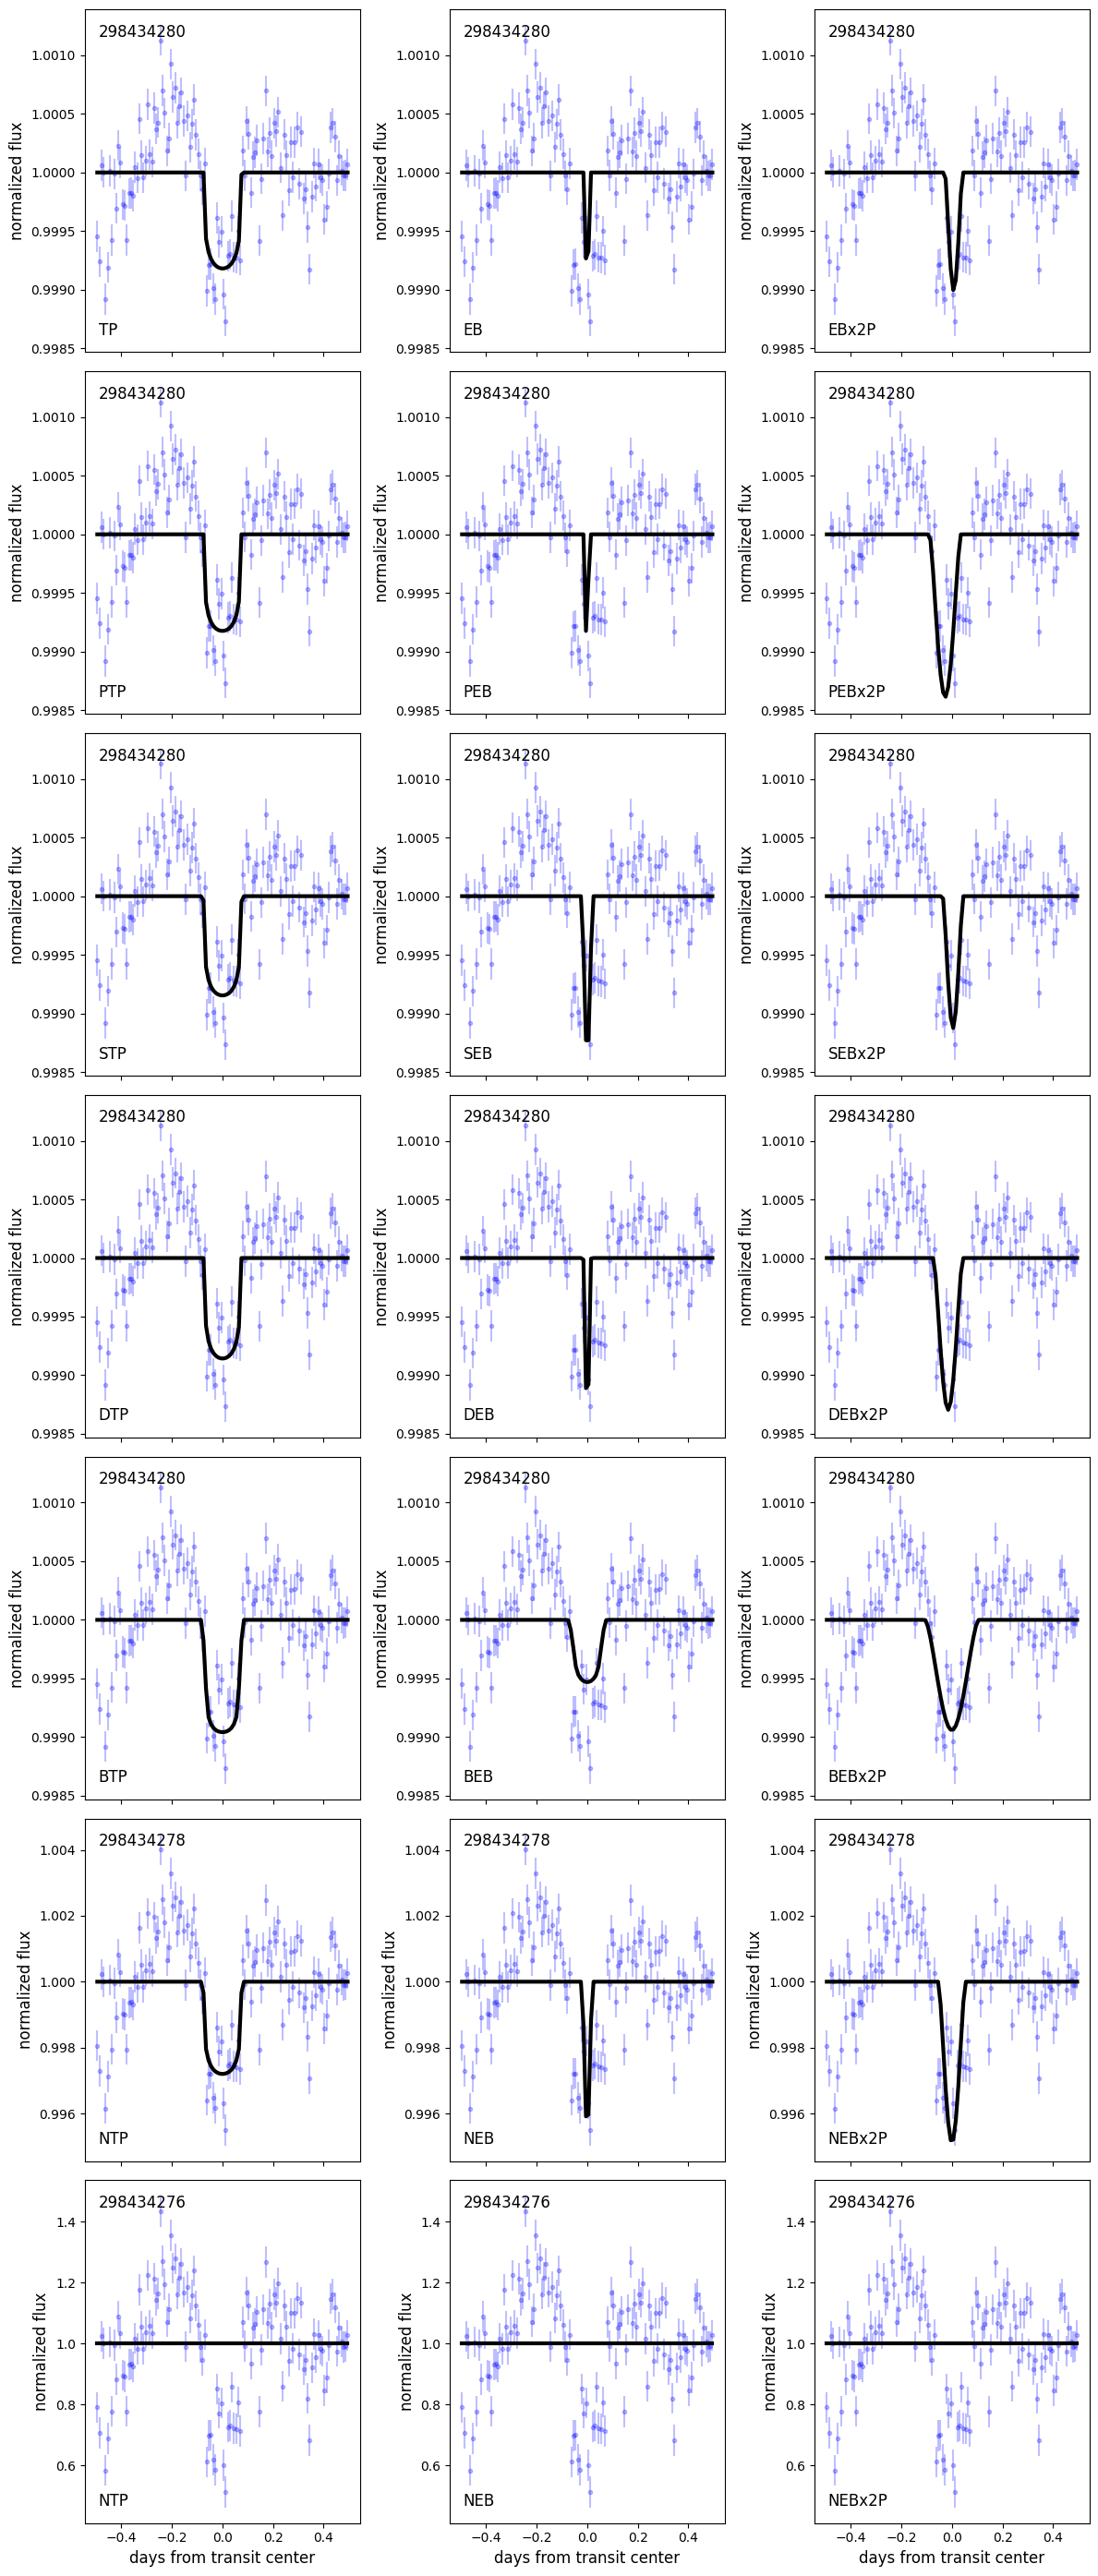

In [15]:
target.plot_fits(time=lc.time.value, flux_0=lc.flux.value, flux_err_0=np.mean(lc.flux_err.value))

In [16]:
%%time

FPPs = np.zeros(20)
NFPPs = np.zeros(20)
for i in range(20):
    target.calc_probs(time=lc.time.value,
                      flux_0=lc.flux.value,
                      flux_err_0=np.mean(lc.flux_err.value),
                      P_orb=P_orb,
                      parallel=True,
                      verbose=0)
    FPPs[i] = target.FPP
    NFPPs[i] = target.NFPP

meanFPP = np.mean(FPPs)
stdvFPP = np.std(FPPs)
print("FPP =", meanFPP, "+/-", stdvFPP)

meanNFPP = np.mean(NFPPs)
stdvNFPP = np.std(NFPPs)
print("NFPP =", meanNFPP, "+/-", stdvNFPP)

FPP = 0.17234773931048744 +/- 0.1094605837904881
NFPP = 0.15847388035125856 +/- 0.10577010147725706
CPU times: user 26min 16s, sys: 48 s, total: 27min 4s
Wall time: 21min 47s


Our final conclusion about this specified planet of TIC 298434280 is that it is nearby false positive (according to the range of FPP and NFPP set by TRICERATOPS).